In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer




In [28]:
dataFrame = pd.read_csv('Pokemon.csv')
dataFrame.info()
dataFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [29]:
dataFrame.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [30]:
dataFrame = dataFrame.drop(['#','Name'], axis=1)
dataFrame

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [31]:
non_numeric_columns = ['Type 1','Type 2','Legendary']

# Convert non numeric columns
label_encoder = LabelEncoder()
dataFrameCopy = dataFrame.copy()
dataFrameCopy[non_numeric_columns] = dataFrameCopy[non_numeric_columns].apply(lambda col: label_encoder.fit_transform(col))
dataFrameCopy

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,13,318,45,49,49,65,65,45,1,0
1,9,13,405,60,62,63,80,80,60,1,0
2,9,13,525,80,82,83,100,100,80,1,0
3,9,13,625,80,100,123,122,120,80,1,0
4,6,18,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,15,4,600,50,100,150,100,150,50,6,1
796,15,4,700,50,160,110,160,110,110,6,1
797,14,8,600,80,110,60,150,130,70,6,1
798,14,1,680,80,160,60,170,130,80,6,1


In [32]:
# Замена пропущенных значений средними значениями
dataFrameCopy['Type 2'].fillna(dataFrameCopy['Type 2'].mean(), inplace=True)

dataFrameCopy.drop(columns=['Total'], inplace=True)




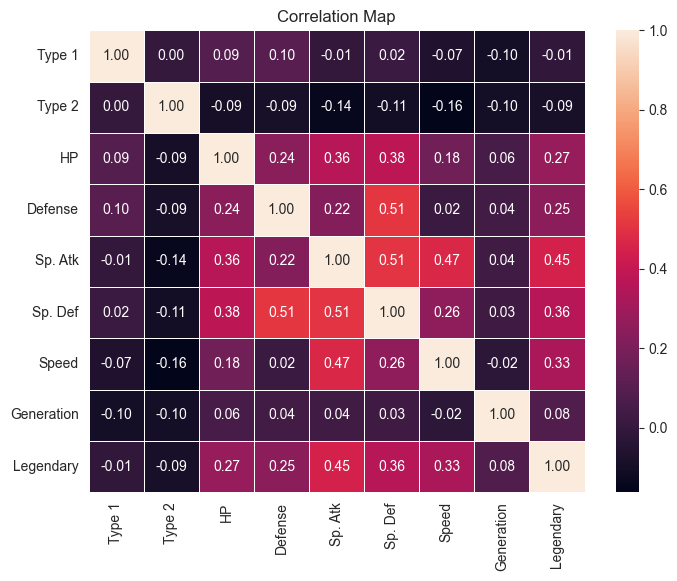

In [33]:
dataFrameCopy.drop(columns=['Attack'], inplace=True)
# Calculate the correlation matrix
correlation_matrix = dataFrameCopy.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Map')
plt.show()

In [34]:
dataFrameCopy['Total Stats'] = dataFrameCopy['HP'] + dataFrameCopy['Defense'] + dataFrameCopy['Sp. Atk'] + dataFrameCopy['Sp. Def'] + dataFrameCopy['Speed']
dataFrameCopy['Atk/Def Ratio'] = dataFrameCopy['Sp. Atk'] / dataFrameCopy['Defense']


In [35]:
dataFrameCopy

,Type 1,Type 2,HP,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Stats,Atk/Def Ratio
0,9,13,45,49,65,65,45,1,0,269,1.326531
1,9,13,60,63,80,80,60,1,0,343,1.269841
2,9,13,80,83,100,100,80,1,0,443,1.204819
3,9,13,80,123,122,120,80,1,0,525,0.991870
4,6,18,39,43,60,50,65,1,0,257,1.395349
...,...,...,...,...,...,...,...,...,...,...,...
795,15,4,50,150,100,150,50,6,1,500,0.666667
796,15,4,50,110,160,110,110,6,1,540,1.454545
797,14,8,80,60,150,130,70,6,1,490,2.500000
798,14,1,80,60,170,130,80,6,1,520,2.833333


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Указание целевого столбца и категориальных признаков
target_column = 'Legendary'
categorical_columns = ['Type 1', 'Type 2']
categorical_indices = [0, 1]

# Разделение данных на тренировочный и тестовый наборы
X = dataFrameCopy.drop(columns=[target_column])
y = dataFrameCopy[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание объекта StandardScaler
std = StandardScaler()

# Подгонка (fit) и преобразование (transform) данных для тренировочного набора
X_train_scaled = std.fit_transform(X_train)

# Преобразование данных тестового набора с использованием параметров, вычисленных на тренировочном наборе
X_test_scaled = std.transform(X_test)


In [69]:

dataFrame.isnull().sum()
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      414 non-null    object
 2   Total       800 non-null    int64 
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 63.4+ KB


In [72]:
from imperio import FrequencyImputationTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
target_column = 'Legendary'


# Разделение данных на тренировочный и тестовый наборы
X = dataFrame.drop(columns=[target_column])
y = dataFrame[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Применение Frequency Imputation ко всем столбцам
freq_transformer = FrequencyImputationTransformer(index= ['Type 2'])

# Определение Pipeline
freq_pipeline = Pipeline([
    ('freq', freq_transformer),  # Применение FrequencyImputationTransformer
    ('model', LogisticRegression())  # Модель логистической регрессии
])

# Обучение Pipeline
freq_pipeline.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_freq = freq_pipeline.predict(X_test)

# Оценка результатов
conf_matrix_freq = confusion_matrix(y_test, y_pred_freq)
accuracy_freq = accuracy_score(y_test, y_pred_freq)

print("Confusion Matrix (Frequency Imputation):")
print(conf_matrix_freq)
print(f"Accuracy (Frequency Imputation): {accuracy_freq:.2f}")


KeyError: 0